## Introduction
In this notebook, I define a Fundamental Neural Network to create Perceptron and Adaline nodes. I then compare the nodes' boundaries for a given input vector, and evaluate their boundaries' performance when adding new points (features) to the input vector. This code was written entirely by me.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### The FundamentalNN class
I defined this class for both Perceptrons and Adaline, hence the "isPerceptron" bool in the init which specifies whether the Perceptron learning algorithm (or Adaline) is used to update weights. I define sigmoid and step activation functions in the class. And I define getters and setters for the weights. 

In [8]:
class FundamentalNN:
    def __init__(self,weight_dimension,isPerceptron=True):
        # weight vector with random values from [-1,1]
        # weight_dimension=(x,y);
        self.weight = np.random.uniform(low=-1,high=1,size=weight_dimension)
        self.isPerceptron = isPerceptron
        self.eta = 0.6

    def train_with_pattern(self,input_vector,target):
        self.input_vector = input_vector.transpose() #convert to 4x1
        self.target = target
        self.update_weight()
    
    def update_weight(self):
        self.tot = np.matmul(self.weight.transpose(),self.input_vector)
        if self.isPerceptron:
            self.output = self.step()
            self.__update_weight_perceptron()
        else:
            self.output = self.tot #pass "tot" into __update_weight_adaline
            self.__update_weight_adaline()
            
    def sig(self):
        return round(1/(1+math.exp(-self.output)))


    def step(self):
        if (self.tot > 1): return 1
        else: return 0
        
    # Uses equation from "Fundamentals of ANN" - slide 34
    def __update_weight_perceptron(self):
        self.delta_w = (self.eta*(self.target-self.output)) * self.input_vector
        self.delta_theta = -self.eta*(self.target-self.output)

        # first value of "weight" is "theta"
        self.weight[1:] += self.delta_w[1:]
        self.weight[:1] += self.delta_theta

    # Based on equation in "special Adaline" from Assignment Q1a
    def __update_weight_adaline(self):
        self.delta_w = self.eta*(self.target-self.sig())*(self.sig()**2)*math.exp(-self.output)*self.input_vector
        
        self.weight += self.delta_w

    def get_weight(self):
        return self.weight
    
    #for new epoch
    def set_weight(self,weight):
        self.weight = weight


### Initialization: Input Data (Training Patterns and Labels)
There are two classes, a and b. I define an input vector composed of 8 training patterns (a1,a2,a3,a4,b1,b2,b3,b4) with their corresponding target values (labels), denoted as y_a and y_b respectively. Each training pattern has 3 dimensions. The first value is always -1, then the next three values are the x,y,z position denoting a point in 3D space. The -1 is used for the weight update for theta.

In [9]:
# [x0, x1, x2, x3]
# [theta, w1, w2, w3]

y_a = 0 #target
a1 = np.array([[-1,0.8,0.7,1.2]])
a2 = np.array([[-1, -0.8, -0.7, 0.2]])
a3 = np.array([[-1, -0.5, 0.3, -0.2]])
a4 = np.array([[-1, -2.8, -0.1, -2]])

y_b = 1 #target
b1 = np.array([[-1, 1.2, -1.7, 2.2]])
b2 = np.array([[-1, -0.8, -2, 0.5]])
b3 = np.array([[-1, -0.5, -2.7, -1.2]])
b4 = np.array([[-1, 2.8, -1.4, 2.1]])

input_vector = np.array([a1,a2,a3,a4,b1,b2,b3,b4])
target = np.array([y_a,y_a,y_a,y_a,y_b,y_b,y_b,y_b])

weight_dimension = (4,1)
Perceptron = FundamentalNN(weight_dimension)
Adaline = FundamentalNN(weight_dimension,False)

### Execution Code
The following code is used to define a Perceptron and Adaline for 10 epochs. 

In [10]:
def isConverged(old_w,new_w):
    tolerance = 0.01
    delta_w = old_w - new_w
    if np.amax(delta_w) < tolerance:
        return True

In [14]:
# PERCEPTRON
total_epochs = 10
for epoch in range(total_epochs):
    print("EPOCH", epoch)
    #set weight from previous epoch
    if epoch > 0:
        Perceptron.set_weight(perceptron_weight)
    
    for k in range(len(input_vector)):
        x = input_vector[k]
        t = target[k]
        Perceptron.train_with_pattern(x,t)

        #last pattern for epoch
        if k == len(input_vector)-1:
            perceptron_weight = Perceptron.get_weight()
        
        #first pattern for new epoch
        if epoch > 0 and k == 0:
            if isConverged(perceptron_weight,Perceptron.get_weight()):
                final_weight_perceptron = Perceptron.get_weight()
                break
    else: continue
    break

print('final weight', final_weight_perceptron)


EPOCH 0
EPOCH 1
final weight [[ 0.44482625]
 [ 0.36866875]
 [-1.36726709]
 [ 0.21817072]]


In [15]:
# ADALINE
total_epochs = 10
for epoch in range(total_epochs):
    print("EPOCH", epoch)
    #set weight from previous epoch
    if epoch > 0:
        Adaline.set_weight(adaline_weight)
    
    for k in range(len(input_vector)):
        x = input_vector[k]
        t = target[k]
        Adaline.train_with_pattern(x,t)

        #last pattern for epoch
        if k == len(input_vector)-1:
            adaline_weight = Adaline.get_weight()
        
        #first pattern for new epoch
        if epoch > 0 and k == 0:
            if isConverged(adaline_weight,Adaline.get_weight()):
                final_weight_adaline = Adaline.get_weight()
                break
    else: continue
    break

print('final weight', final_weight_adaline)

EPOCH 0
EPOCH 1
final weight [[ 0.93164303]
 [-0.41044087]
 [ 0.24721678]
 [ 0.48693152]]


### Plotting

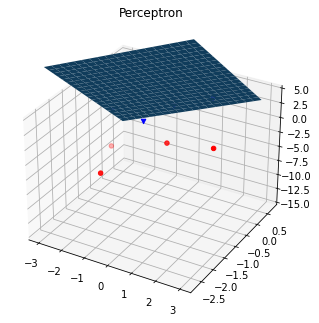

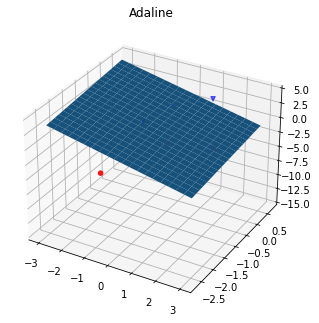

In [16]:
#Define points
x_1 = input_vector[:4,:,1]
y_1 = input_vector[:4,:,2]
z_1 = input_vector[:4,:,3]

x_2 = input_vector[4:,:,1]
y_2 = input_vector[4:,:,2]
z_2 = input_vector[4:,:,3]

#Define planes
wx_a = final_weight_adaline[1][0]
wy_a = final_weight_adaline[2][0]
wz_a = final_weight_adaline[3][0]
wb_a = final_weight_adaline[0][0]

wx_p = final_weight_perceptron[1][0]
wy_p = final_weight_perceptron[2][0]
wz_p = final_weight_perceptron[3][0]
wb_p = final_weight_perceptron[0][0]

x = np.linspace(-3,3,20)
y = np.linspace(-2.5,0.5,20)
X,Y = np.meshgrid(x,y)
Z_p = (wx_p*X + wy_p*Y + wb_p)/wz_p
Z_a = (wx_a*X + wy_a*Y + wb_a)/wz_a


#Final Plots
fig = plt.figure()
ax = Axes3D(fig)
ax.set_title('Perceptron')
ax.scatter(x_1,y_1,z_1,marker="v",c="blue")
ax.scatter(x_2,y_2,z_2,marker="o",c="red")
ax.plot_surface(X,Y,Z_p)
ax.set_zlim(-15, 5)

fig = plt.figure()
ax = Axes3D(fig)
ax.set_title('Adaline')
ax.scatter(x_1,y_1,z_1,marker="v",c="blue")
ax.scatter(x_2,y_2,z_2,marker="o",c="red")
ax.plot_surface(X,Y,Z_a)
ax.set_zlim(-15, 5)

plt.show()

### Adding a New Point

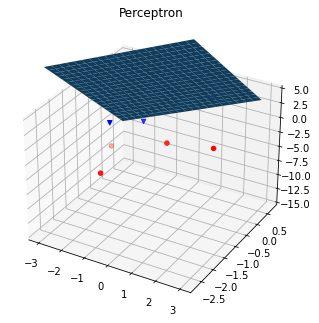

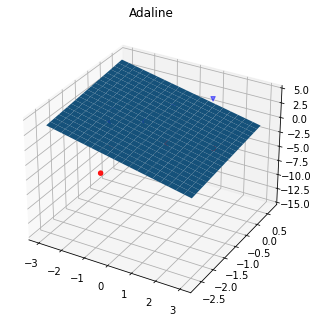

In [17]:
x_1new = np.append(x_1,-1.4)
y_1new = np.append(y_1,-1.5)
z_1new = np.append(z_1,2)

fig = plt.figure()
ax = Axes3D(fig)
ax.set_title('Perceptron')
ax.scatter(x_1new,y_1new,z_1new,marker="v",c="blue")
ax.scatter(x_2,y_2,z_2,marker="o",c="red")
ax.plot_surface(X,Y,Z_p)
ax.set_zlim(-15, 5)

fig = plt.figure()
ax = Axes3D(fig)
ax.set_title('Adaline')
ax.scatter(x_1new,y_1new,z_1new,marker="v",c="blue")
ax.scatter(x_2,y_2,z_2,marker="o",c="red")
ax.plot_surface(X,Y,Z_a)
ax.set_zlim(-15, 5)

plt.show()